**Author**: Salma Elshahawy

**Date**: June, 18, 2020

**Title**: DATA 612, Recommender system, [project#4](https://github.com/salma71/MSDS_SU2020/blob/master/Recommender_system612/week_4/Anime_recommender.ipynb)

**Github repo**: [Accuracy and Beyond](https://github.com/salma71/MSDS_SU2020/tree/master/Recommender_system612/week_4)


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/anime-recommendations-database/rating.csv
/kaggle/input/anime-recommendations-database/anime.csv


In [2]:
import numpy as np
import pandas as pd


In [3]:
anime_data = pd.read_csv('../input/anime-recommendations-database/anime.csv')
anime_data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
rating_data = pd.read_csv('../input/anime-recommendations-database/rating.csv')
rating_data.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [5]:
# join the user_id with the anime_data using anime_id, then drop rating from the rating table
rating_data = rating_data.drop(['rating'], axis = 1)
all_data = pd.merge(anime_data, rating_data, on='anime_id')
all_data.head()

,anime_id,name,genre,type,episodes,rating,members,user_id
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278


In [6]:
# getting shape 
all_data.shape

(7813727, 8)

In [7]:
all_data.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
user_id       int64
dtype: object

In [8]:
print(all_data.describe().to_markdown())

|       |        anime_id |      rating |          members |         user_id |
|:------|----------------:|------------:|-----------------:|----------------:|
| count |     7.81373e+06 | 7.81372e+06 |      7.81373e+06 |     7.81373e+06 |
| mean  |  8909.05        | 7.65313     | 178621           | 36728           |
| std   |  8883.92        | 0.673029    | 188176           | 20998           |
| min   |     1           | 1.67        |     29           |     1           |
| 25%   |  1240           | 7.27        |  44030           | 18974           |
| 50%   |  6213           | 7.68        | 110470           | 36791           |
| 75%   | 14093           | 8.13        | 244268           | 54757           |
| max   | 34519           | 9.5         |      1.01392e+06 | 73516           |


In [9]:
# how much is the missing data

print(all_data.isnull().sum().to_markdown())

|          |   0 |
|:---------|----:|
| anime_id |   0 |
| name     |   0 |
| genre    | 110 |
| type     |   4 |
| episodes |   0 |
| rating   |   6 |
| members  |   0 |
| user_id  |   0 |


In [10]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(all_data.rating.min()))
print('Maximum rating is: %d' %(all_data.rating.max()))

Minimum rating is: 1
Maximum rating is: 9


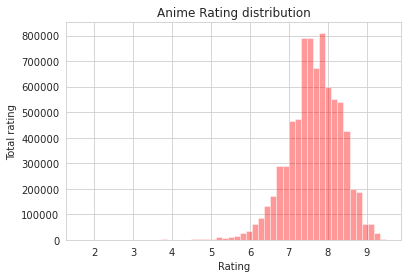

In [11]:
# Check the distribution of the rating
import seaborn as sns

with sns.axes_style('white'):
    g = sns.set_style('whitegrid') 
    g = sns.distplot(all_data['rating'], kde = False, color ='red', bins = 50)
    g.set(xlabel='Rating', ylabel='Total rating', title = 'Anime Rating distribution')

In [12]:
print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",all_data.shape[0])
print("Total No of Users   :", len(np.unique(all_data.user_id)))
print("Total No of anime movies  :", len(np.unique(all_data.anime_id)))


Total data 
--------------------------------------------------

Total no of ratings : 7813727
Total No of Users   : 73515
Total No of anime movies  : 11197


In [13]:
#Analysis of rating given by the user 

no_of_rated_anime_per_user = all_data.groupby('user_id')['rating'].count().sort_values(ascending=False)

no_of_rated_anime_per_user.head()

user_id
48766    10226
42635     3747
53698     2905
57620     2702
59643     2633
Name: rating, dtype: int64

In [14]:
pd.set_option('precision', 2)
no_of_rated_anime_per_user.describe()

count    73515.00
mean       106.29
std        153.09
min          1.00
25%         18.00
50%         57.00
75%        136.00
max      10226.00
Name: rating, dtype: float64

In [15]:
quantiles = no_of_rated_anime_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

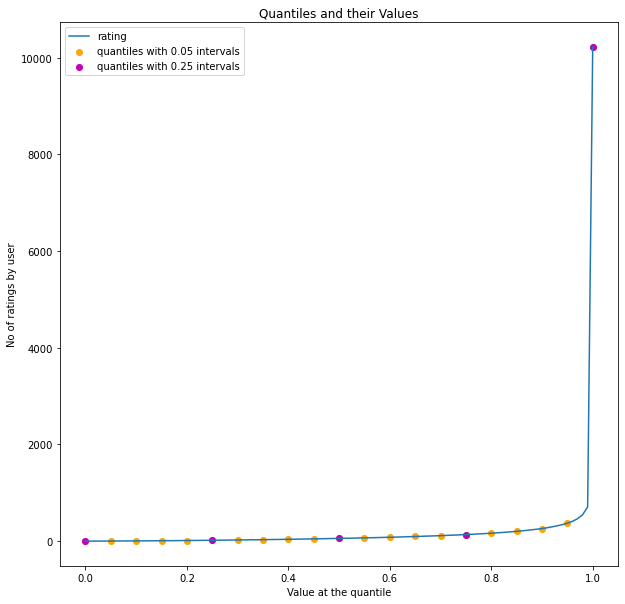

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [17]:
print('\n No of rated anime more than 1000 per user : {}\n'.format(sum(no_of_rated_anime_per_user >= 1000)) )


 No of rated anime more than 1000 per user : 238



In [18]:
#Getting the new dataframe which contains users who has given 50 or more ratings

new_df=all_data.groupby("anime_id").filter(lambda x:x['rating'].count() >=1000)

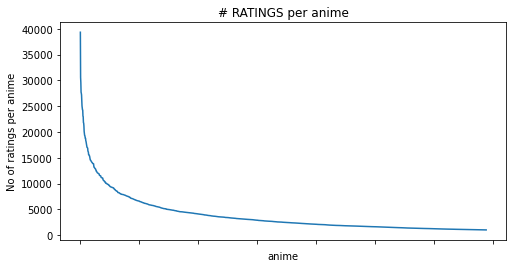

In [19]:
no_of_ratings_per_anime = new_df.groupby(by='anime_id')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_anime.values)
plt.title('# RATINGS per anime')
plt.xlabel('anime')
plt.ylabel('No of ratings per anime')
ax.set_xticklabels([])

plt.show()

In [20]:
#Average rating of the anime 

new_df.groupby('anime_id')['rating'].mean().head()

anime_id
1     8.82
5     8.40
6     8.32
7     7.36
15    8.08
Name: rating, dtype: float64

In [21]:
new_df.groupby('anime_id')['rating'].mean().sort_values(ascending=False).head(10)

anime_id
32281    9.37
5114     9.26
28977    9.25
9253     9.17
9969     9.16
32935    9.15
11061    9.13
15417    9.11
15335    9.10
4181     9.06
Name: rating, dtype: float64

In [22]:
new_df.groupby('anime_id')['rating'].count().sort_values(ascending=False).head(10)

anime_id
1535     39340
11757    30583
16498    29584
1575     27718
226      27506
6547     27183
20       25925
121      25032
5114     24574
4224     24283
Name: rating, dtype: int64

In [23]:
ratings_mean_count = pd.DataFrame(new_df.groupby(['anime_id', 'name'])['rating'].mean())
display(ratings_mean_count.head(10))

,,rating
anime_id,name,
1,Cowboy Bebop,8.82
5,Cowboy Bebop: Tengoku no Tobira,8.40
6,Trigun,8.32
7,Witch Hunter Robin,7.36
15,Eyeshield 21,8.08
16,Hachimitsu to Clover,8.18
18,Initial D Fourth Stage,8.24
19,Monster,8.72
20,Naruto,7.81


In [24]:
ratings_mean_count['rating_count'] = pd.DataFrame(new_df.groupby(['anime_id', 'name'])['rating'].count())
display(ratings_mean_count.head(10))

,,rating,rating_count
anime_id,name,,
1,Cowboy Bebop,8.82,15509
5,Cowboy Bebop: Tengoku no Tobira,8.40,6927
6,Trigun,8.32,11077
7,Witch Hunter Robin,7.36,2629
15,Eyeshield 21,8.08,2424
16,Hachimitsu to Clover,8.18,3890
18,Initial D Fourth Stage,8.24,1911
19,Monster,8.72,4594
20,Naruto,7.81,25925


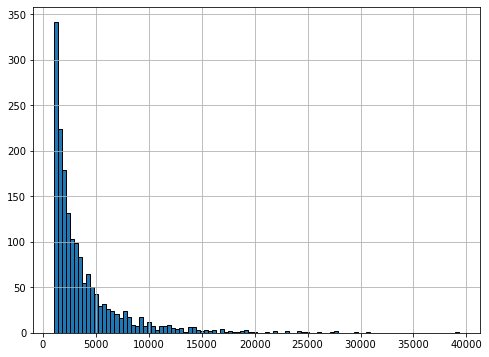

In [25]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_count'].hist(bins=100)

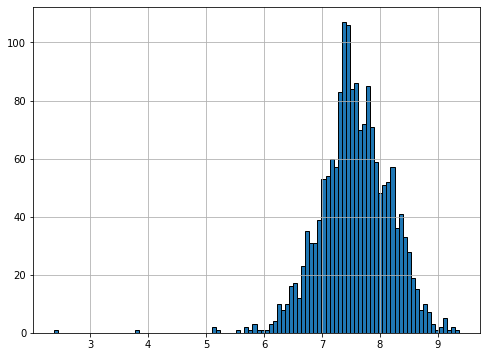

In [26]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=100)

<Figure size 576x432 with 0 Axes>

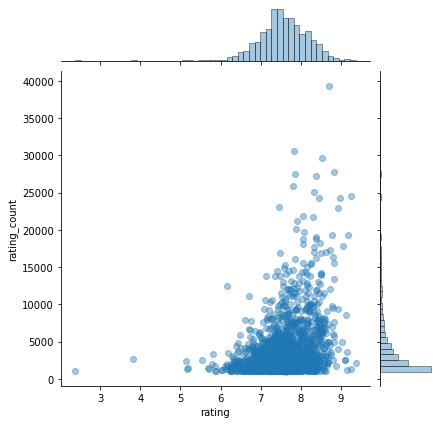

In [27]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_count', data=ratings_mean_count, alpha=0.4)

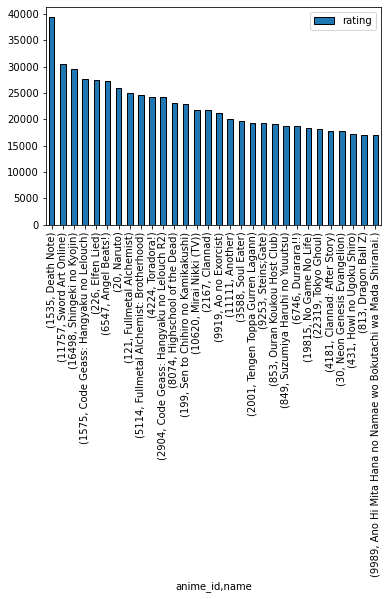

In [28]:
popular_anime = pd.DataFrame(new_df.groupby(['anime_id', 'name'])['rating'].count())
most_popular = popular_anime.sort_values('rating', ascending=False)
most_popular.head(30).plot(kind = "bar")

In [29]:
new_df.head()

,anime_id,name,genre,type,episodes,rating,members,user_id
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278


In [30]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(new_df,
                              test_size = 0.2,
                              random_state = 42)

print('# ratings in the train set: %d'% len(train))
print('# ratings in the test set: %d'% len(test))

# ratings in the train set: 5287141
# ratings in the test set: 1321786


In [31]:
display(train.head(10))
# print(test.shape)

,anime_id,name,genre,type,episodes,rating,members,user_id
1863866,21647,Tamako Love Story,"Comedy, Romance, Slice of Life",Movie,1,8.16,72708,30097
4550869,15583,Date A Live,"Comedy, Harem, Mecha, Romance, School, Sci-Fi",TV,12,7.54,301358,71758
632057,10087,Fate/Zero,"Action, Fantasy, Supernatural",TV,13,8.51,453630,34925
3181150,11757,Sword Art Online,"Action, Adventure, Fantasy, Game, Romance",TV,25,7.83,893100,46754
1427581,4477,Nodame Cantabile: Paris-hen,"Comedy, Josei, Music, Romance, Slice of Life",TV,11,8.27,70822,58327
4386130,59,Chobits,"Comedy, Drama, Ecchi, Romance, Sci-Fi, Seinen",TV,26,7.57,266846,10622
1368792,2167,Clannad,"Comedy, Drama, Romance, School, Slice of Life,...",TV,23,8.30,566690,59988
1238245,121,Fullmetal Alchemist,"Action, Adventure, Comedy, Drama, Fantasy, Mag...",TV,51,8.33,600384,54308
1688319,1430,Lupin III: Cagliostro no Shiro,"Adventure, Comedy, Shounen",Movie,1,8.20,32732,29963
3921787,5958,Sora no Otoshimono,"Comedy, Ecchi, Harem, Romance, Sci-Fi, Shounen...",TV,13,7.68,227681,44667


In [32]:
#Indexing by user_id to speed up the searches during evaluation
new_df_indexed = new_df.set_index('user_id')
train_df_indexed = train.set_index('user_id')
test_df_indexed = test.set_index('user_id')

## Building Model - Popularity

In [33]:
class PopularityRecommender:
    
    MODEL_NAME = 'Popularity'
    
    def __init__(self):
        self.train_df = None
        self.user_id = None
        self.item_id = None
        self.pop_recomd = None
        
    # create recommender model
    def create(self, train_df, user_id, item_id):
        self.train_df = train_df
        self.user_id = user_id
        self.item_id = item_id
        
        # get the count of use_ids for each unique anime as a recommendation score
        train_grouped = train_df.groupby([self.item_id]).agg({self.user_id: 'count'}).reset_index()
        train_grouped.rename(columns = {'user_id': 'score'}, inplace = True)
        
        # sort the animes based on the recommendation rank score
        train_sort = train_grouped.sort_values(['score', self.item_id],ascending=[0,1])
        
        # generate a recommendation
        train_sort['rating'] = train_sort['score'].rank(ascending = 0, method= 'first')
        
        # get the top 10
        self.pop_recomd = train_sort.head(10)
        
    # use the model to generate recommendations
    def recommend(self, user_id):
        user_recommend = self.pop_recomd
        
        # add user_id column  for which the recommendations are being generated
        user_recommend['user_id'] = user_id
        
        # bring user_id column to the start
        cols = user_recommend.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommend = user_recommend[cols]
        
        return user_recommend

In [34]:
pop_model = PopularityRecommender()

In [35]:
pop_model.create(train, 'user_id', 'name')

In [36]:
users = train['user_id']
user_id = users.iloc[5]

pop_model.recommend(user_id)

,user_id,name,score,rating
334,10622,Death Note,31388,1.0
1512,10622,Sword Art Online,24417,2.0
1428,10622,Shingeki no Kyojin,23722,3.0
275,10622,Code Geass: Hangyaku no Lelouch,22124,4.0
418,10622,Elfen Lied,22027,5.0
69,10622,Angel Beats!,21739,6.0
1069,10622,Naruto,20705,7.0
476,10622,Fullmetal Alchemist,20051,8.0
477,10622,Fullmetal Alchemist: Brotherhood,19642,9.0
1597,10622,Toradora!,19478,10.0


In [37]:
users = train['user_id']
user_id = users.iloc[700]

pop_model.recommend(user_id)

,user_id,name,score,rating
334,18203,Death Note,31388,1.0
1512,18203,Sword Art Online,24417,2.0
1428,18203,Shingeki no Kyojin,23722,3.0
275,18203,Code Geass: Hangyaku no Lelouch,22124,4.0
418,18203,Elfen Lied,22027,5.0
69,18203,Angel Beats!,21739,6.0
1069,18203,Naruto,20705,7.0
476,18203,Fullmetal Alchemist,20051,8.0
477,18203,Fullmetal Alchemist: Brotherhood,19642,9.0
1597,18203,Toradora!,19478,10.0


## Building Model - Collaborative based filtering

### Collaborative Filtering (CF) has two main implementation strategies:

* Memory-based: This approach uses the memory of previous users interactions to compute users similarities based on items they've interacted (user-based approach) or compute items similarities based on the users that have interacted with them (item-based approach).
A typical example of this approach is User Neighbourhood-based CF, in which the top-N similar users (usually computed using Pearson correlation) for a user are selected and used to recommend items those similar users liked, but the current user have not interacted yet. This approach is very simple to implement, but usually do not scale well for many users. A nice Python implementation of this approach in available in Crab.
* Model-based: This approach, models are developed using different machine learning algorithms to recommend items to users. There are many model-based CF algorithms, like neural networks, bayesian networks, clustering models, and latent factor models such as Singular Value Decomposition (SVD) and, probabilistic latent semantic analysis.

#### Matrix Factorization
Latent factor models compress user-item matrix into a low-dimensional representation in terms of latent factors. One advantage of using this approach is that instead of having a high dimensional matrix containing abundant number of missing values we will be dealing with a much smaller matrix in lower-dimensional space.
A reduced presentation could be utilized for either user-based or item-based neighborhood algorithms that are presented in the previous section. There are several advantages with this paradigm. It handles the sparsity of the original matrix better than memory based ones. Also comparing similarity on the resulting matrix is much more scalable especially in dealing with large sparse datasets.

In [38]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os


In [39]:
#Reading the dataset
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(new_df[['user_id','anime_id','rating']],reader)

In [40]:
from surprise import Reader, SVD, Dataset
from surprise.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.25)

In [41]:
#train SVD recommender 
algo = SVD()
algo.fit(trainset)

In [42]:
#make predictions on test set. 
predictions = algo.test(testset)


In [43]:
from surprise import accuracy
accuracy.rmse(predictions, verbose=True)

RMSE: 0.0152


0.015204045390479969

In [44]:
accuracy.mae(predictions, verbose=True)

MAE:  0.0121


0.012131543077205917

In [64]:
from surprise import BaselineOnly
print('Using ALS')
bsl_options = {'method': 'als',
               'n_epochs': 5,
               'reg_u': 12,
               'reg_i': 5
               }

algo_2 = BaselineOnly(bsl_options=bsl_options)

Using ALS


In [65]:
algo_2.fit(trainset)

Estimating biases using als...


In [66]:
predictions_als = algo_2.test(testset)

In [67]:
accuracy.rmse(predictions_als, verbose=True)

RMSE: 0.0016


0.0015858204235508501

In [68]:
accuracy.mae(predictions_als, verbose=True)

MAE:  0.0010


0.0009724520761850537

In [70]:
from surprise import NormalPredictor
algo_3 = NormalPredictor()

In [71]:
algo_3.fit(trainset)

In [72]:
predictions_norm = algo_3.test(testset)

In [73]:
accuracy.rmse(predictions_norm, verbose=True)

RMSE: 0.8447


0.8446522776625315

In [74]:
accuracy.mae(predictions_als, verbose=True)

MAE:  0.0010


0.0009724520761850537

## Summary

- Prediction accuracy **RMSE** using ALS algorithms gave the lowest error, 0.0016 compared to Single value Decomposition SVD and randome predictor with values 0.0152 and 0.8 respectively. I believe that's because ALS uses the regularization parameter for both items and users.

- in an online evaluation environment, a primary objective should be to evaluate the effectiveness of recommendations from these models. For instance, in this project, we measure accuracy by a model’s ability to predict user ratings. However, it would be enlightening (and commercially valuable) to see how effective the models are in generating actionable movie recommendations. For instance, an experiment could be done in a Netflix-style environment, where top-5 lists of recommended movies produced by different recommender models are shown to randomly selected samples of users. Then the click-through rate or intensity of the user interaction (from ignoring the recommendation, to viewing a movie description or trailer, to watching a portion or all of the movie) could be measured over a subsequent time period. Based on the results of the experiment, we could then determine which algorithms produce recommendations that are most effective at triggering a positive user response. This points to the difference between generating accurate ratings versus effective recommendations, and shifts the focus to model development that enhances the user experience and promotes greater user engagement and satisfaction. Such a development focus would have direct commercial benefits including lower attrition rates and higher revenue potential for the client base.
